Path Finder for connected and independent q-incomplete graph partitinos

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import more_itertools

In [43]:
n = 6
k = 4
G = nx.cycle_graph(n)

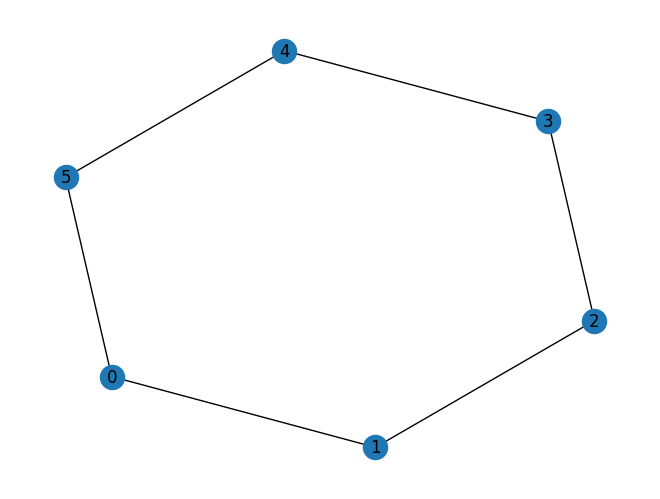

In [44]:
nx.draw(G, labels={i: i for i in G.nodes()})

In [45]:
vertices = tuple(range(n))
print (vertices)

s1 = more_itertools.set_partitions(vertices, k)
for p in s1:
    print (p)

(0, 1, 2, 3, 4, 5)
[[0], [1], [2], [3, 4, 5]]
[[0], [1], [2, 3], [4, 5]]
[[0], [1], [3], [2, 4, 5]]
[[0], [1], [2, 3, 4], [5]]
[[0], [1], [3, 4], [2, 5]]
[[0], [1], [2, 4], [3, 5]]
[[0], [1], [4], [2, 3, 5]]
[[0], [1, 2], [3], [4, 5]]
[[0], [2], [1, 3], [4, 5]]
[[0], [2], [3], [1, 4, 5]]
[[0], [1, 2], [3, 4], [5]]
[[0], [2], [1, 3, 4], [5]]
[[0], [2], [3, 4], [1, 5]]
[[0], [1, 2], [4], [3, 5]]
[[0], [2], [1, 4], [3, 5]]
[[0], [2], [4], [1, 3, 5]]
[[0], [1, 2, 3], [4], [5]]
[[0], [2, 3], [1, 4], [5]]
[[0], [2, 3], [4], [1, 5]]
[[0], [1, 3], [2, 4], [5]]
[[0], [3], [1, 2, 4], [5]]
[[0], [3], [2, 4], [1, 5]]
[[0], [1, 3], [4], [2, 5]]
[[0], [3], [1, 4], [2, 5]]
[[0], [3], [4], [1, 2, 5]]
[[0, 1], [2], [3], [4, 5]]
[[1], [0, 2], [3], [4, 5]]
[[1], [2], [0, 3], [4, 5]]
[[1], [2], [3], [0, 4, 5]]
[[0, 1], [2], [3, 4], [5]]
[[1], [0, 2], [3, 4], [5]]
[[1], [2], [0, 3, 4], [5]]
[[1], [2], [3, 4], [0, 5]]
[[0, 1], [2], [4], [3, 5]]
[[1], [0, 2], [4], [3, 5]]
[[1], [2], [0, 4], [3, 5]]
[[1], [2]

In [46]:
def is_connected(G, partition):
    for block in partition:
        if not nx.is_connected(G.subgraph(block)):
            return False
    return True

def is_q_complete(G, partition,):
    Q = nx.quotient_graph(G, partition)
    n = len(Q.nodes)
    return Q.number_of_edges() == n * (n - 1) / 2

def is_independent(G, partition):
    for block in partition:
        if not nx.is_empty(G.subgraph(block)):
            return False
    return True

In [47]:
def get_num_interior_edges(G, partition):
    return sum(G.subgraph(block).number_of_edges() for block in partition)

def get_num_exterior_edges(G, partition):
    return G.number_of_edges() - get_num_interior_edges(G, partition)

In [48]:
def render_graph(G, partition):
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black']
    color_map = [0] * G.number_of_nodes()
    # set the colors
    for i, block in enumerate(partition):
        for v in block:
            color_map[v] = colors[i]
            
    nx.draw(G, labels={i: i for i in G.nodes()}, node_color=color_map)
    plt.show()
    plt.close()

In [49]:
s1 = more_itertools.set_partitions(vertices, k)
s1 = [[set(p) for p in part] for part in s1]
# s1 = [[set(p) for p in part] for part in s1 if is_connected(G, part)]
part_props = []
for e, partition in enumerate(s1):
    
    props = dict()
    props['is_connected'] = is_connected(G, partition)
    props['is_q_complete'] = is_q_complete(G, partition)
    props['is_independent'] = is_independent(G, partition)
    print (partition, props)
    part_props.append(props)
    # render_graph(G, partition)
    

[{0}, {1}, {2}, {3, 4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3}, {4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {3}, {2, 4, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3, 4}, {5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {3, 4}, {2, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 4}, {3, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': True}
[{0}, {1}, {4}, {2, 3, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1, 2}, {3}, {4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {2}, {1, 3}, {4, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {2}, {3}, {1, 4, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0},

In [ ]:
def can_transform_by_one_move(p1, p2):
    """
    Check if partition p1 can be transformed into p2 by moving one element.
    
    Args:
        p1: List of sets representing the first partition
        p2: List of sets representing the second partition
        
    Returns:
        bool: True if transformation is possible with one move
    """
    # Check if the number of blocks is the same
    if len(p1) != len(p2):
        return False
    
    
    for ba, bb in zip(p1, p2):
        
        # If the blocks are the same, move to the next pair
        if ba == bb:
            continue
        
        # check if one block is a subset of the other (this is required)
        if ba.issubset(bb) or bb.issubset(ba):
            continue
        
        # check if the symmetric difference of the two blocks is a single element
        if len(ba.symmetric_difference(bb)) == 1:
            continue
        
        # If none of the conditions are met, return False
        return False
    
    # if all blocks are equal now, we need to return false
    all_equal = all(ba == bb for ba, bb in zip(p1, p2))

    return not all_equal


True
True
False


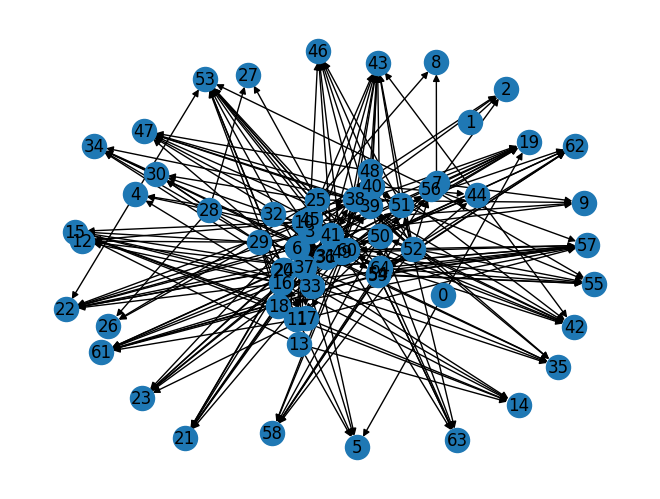

In [57]:
# let's create a graph that represents all connected partitions with an edge between them if 
# they can be transformed by one move

Gr = nx.DiGraph()
for e1, p1 in enumerate(s1):
    for e2, p2 in enumerate(s1):
        if can_transform_by_one_move(p1, p2):
            if get_num_interior_edges(G, p1) > get_num_interior_edges(G, p2):
                Gr.add_edge(e1, e2)

colors = ['gray'] * len(s1)
for i, p in enumerate(s1):
    if i in Gr:
        Gr.nodes[i]['type'] = part_props[i]['is_connected'] * 4 + part_props[i]['is_q_complete'] * 2 + part_props[i]['is_independent']
    
    
nx.draw(Gr, with_labels=True,)

In [58]:
def find_path_between_types(G, start_type, end_type):
    # Find all nodes of the start and end types
    start_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == start_type]
    end_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == end_type]
    
    print ('start_nodes', start_nodes)
    print ('end_nodes', end_nodes)
    
    paths = []
    
    # Try each combination of start and end nodes
    for start_node in start_nodes:
        for end_node in end_nodes:
            try:
                # Find shortest path between these nodes
                path = nx.shortest_path(G, start_node, end_node)
                paths.append(path)
            except nx.NetworkXNoPath:
                continue
    
    return paths  


In [61]:
for i in Gr:
    print (i, Gr.nodes[i].get('type'), part_props[i]['is_connected'], part_props[i]['is_q_complete'], part_props[i]['is_independent'])

0 4 True False False
5 1 False False True
19 1 False False True
1 4 True False False
2 0 False False False
3 4 True False False
4 0 False False False
6 0 False False False
13 0 False False False
22 1 False False True
53 1 False False True
7 4 True False False
8 0 False False False
9 0 False False False
11 0 False False False
10 4 True False False
12 0 False False False
15 1 False False True
33 0 False False False
14 1 False False True
16 4 True False False
17 0 False False False
18 0 False False False
20 0 False False False
21 1 False False True
23 1 False False True
24 0 False False False
41 0 False False False
45 0 False False False
57 1 False False True
61 1 False False True
25 4 True False False
26 0 False False False
27 0 False False False
30 0 False False False
31 0 False False False
28 4 True False False
29 4 True False False
34 1 False False True
36 0 False False False
38 0 False False False
35 1 False False True
32 4 True False False
37 4 True False False
39 0 False False Fals

In [62]:
path = find_path_between_types(Gr, 4, 1)

print (path)
print ()
print ('Number of paths found:', len(path))

start_nodes [0, 1, 3, 7, 10, 16, 25, 28, 29, 32, 37, 40, 49, 52, 64]
end_nodes [5, 19, 22, 53, 15, 14, 21, 23, 57, 61, 34, 35, 43, 47, 42, 46, 55, 58, 62, 63]
[[0, 5], [0, 19], [3, 5], [3, 19], [3, 22], [3, 53], [3, 13, 15], [3, 13, 14], [7, 11, 15], [7, 11, 14], [10, 6, 5], [10, 6, 19], [10, 4, 22], [10, 4, 53], [10, 15], [10, 11, 14], [10, 33, 34], [10, 33, 35], [16, 5], [16, 19], [16, 22], [16, 53], [16, 15], [16, 14], [16, 21], [16, 23], [16, 57], [16, 61], [16, 33, 34], [16, 33, 35], [16, 41, 43], [16, 45, 47], [16, 41, 42], [16, 41, 46], [25, 11, 15], [25, 11, 14], [25, 30, 34], [25, 31, 35], [28, 30, 34], [28, 31, 35], [29, 13, 5], [29, 15], [29, 11, 14], [29, 18, 21], [29, 18, 57], [29, 18, 61], [29, 34], [29, 31, 35], [29, 38, 43], [29, 38, 47], [29, 38, 42], [29, 38, 46], [32, 30, 34], [32, 31, 35], [32, 38, 43], [32, 38, 47], [32, 38, 42], [32, 38, 46], [37, 20, 19], [37, 20, 22], [37, 20, 53], [37, 15], [37, 14], [37, 21], [37, 23], [37, 17, 57], [37, 17, 61], [37, 31, 34],

In [64]:
for parti in path[0]:
    print (s1[parti], part_props[parti])

[{0}, {1}, {2}, {3, 4, 5}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 4}, {3, 5}] {'is_connected': False, 'is_q_complete': False, 'is_independent': True}


In [ ]:
render_graph(G, s1[path[0][0]])
render_graph(G, s1[path[0][1]])